In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [29]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [30]:
df=df.drop(["deck","embark_town","alive","class","who","adult_male","alone"],axis=1)

df["age"].fillna(df["age"].median(),inplace=True)

df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

df=pd.get_dummies(df,columns=["sex","embarked"],drop_first=True)

df.head()


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [31]:
df.isnull().sum()

,0
survived,0
pclass,0
age,0
sibsp,0
parch,0
fare,0
sex_male,0
embarked_Q,0
embarked_S,0


In [35]:
y=df["survived"]
x=df.drop("survived",axis=1)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [39]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_predict=model.predict(x_test)

In [42]:
print("Accuracy:",accuracy_score(y_test,y_predict)*100)
print("\nconfusion matix:\n",confusion_matrix(y_test,y_predict))
print("\nclassification report:\n",classification_report(y_test,y_predict))

Accuracy: 79.88826815642457

confusion matix:
 [[89 16]
 [20 54]]

classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



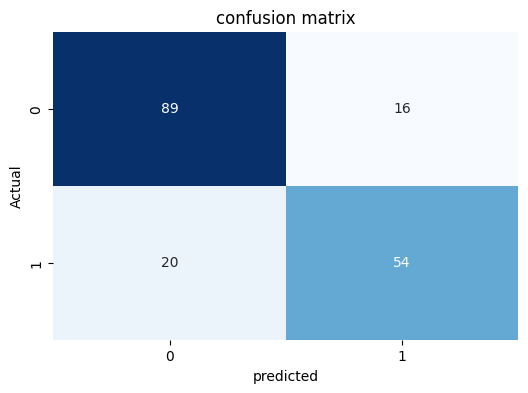

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("confusion matrix")
plt.show()

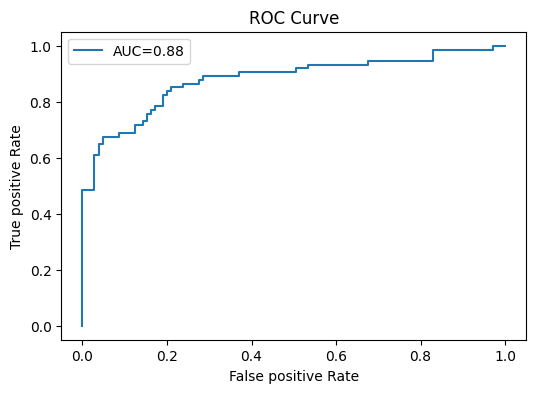

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,throsholds=roc_curve(y_test,y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f"AUC={roc_auc_score(y_test,y_prob):.2f}")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


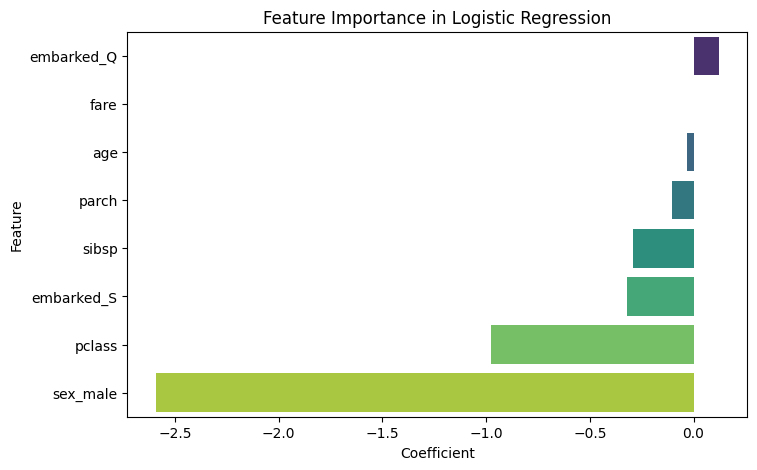

In [49]:
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance in Logistic Regression")
plt.show()
